In [1]:
import numpy as np
import pandas as pd 
import os 
import pickle
from tokenizer import NLTKTokenizer
from tqdm import tqdm

In [2]:
from math import log

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
import itertools

In [78]:
import seaborn as sns

In [5]:
CWD = os.getcwd()
TRAIN_DATA_PATH = os.path.join(CWD, 'data', 'trainset.csv')
VALID_DATA_PATH = os.path.join(CWD, 'data', 'validset.csv')
TEST_DATA_PATH = os.path.join(CWD, 'data', 'testset.csv')
# TRAIN_DICT_PATH = os.path.join(CWD, 'data', 'train_dictionary.pkl')
# VALID_DICT_PATH = os.path.join(CWD, 'data', 'valid_dictionary.pkl')
WORKERS = os.cpu_count()

In [6]:
Train_Tokenizer = NLTKTokenizer()
Valid_Tokenizer = NLTKTokenizer()

In [7]:
train = pd.read_csv(TRAIN_DATA_PATH)
valid = pd.read_csv(VALID_DATA_PATH)
test = pd.read_csv(TEST_DATA_PATH)

In [8]:
tqdm.pandas()
train['Abstract'] = train['Abstract'].progress_apply(func=lambda doc : doc.split('$$$'))
valid['Abstract'] = valid['Abstract'].progress_apply(func=lambda doc : doc.split('$$$'))

100%|██████████| 700/700 [00:00<00:00, 310722.07it/s]


In [9]:
def GenDict(dataset, Tokenizer):
    for item in dataset['Abstract']:
        Tokenizer.build_dict(item)



In [10]:
GenDict(train, Train_Tokenizer)
GenDict(valid, Valid_Tokenizer)

In [11]:
train_freq = Train_Tokenizer.token_freq
valid_freq = Valid_Tokenizer.token_freq

In [12]:
len(valid_freq)

10543

In [13]:
def SortWordFreq(traindict, validdict):
    traindict = sorted(traindict.items(), key= lambda kv :( kv[1], kv[0] ), reverse=True )
    valid_count = [ 0 for _ in range(len(traindict))]
    
    i = 0
    for token, value in traindict:
        if token in validdict:
            valid_count[i] = validdict[token]
        i += 1
    return [ count for token, count in traindict ], valid_count



In [14]:
train_count, valid_count = SortWordFreq(train_freq, valid_freq)

In [15]:
train_sum = sum(train_count)
valid_sum = sum(valid_count)

In [16]:
train_sum

684686

In [17]:
valid_sum

72838

In [17]:
# train_count = [ i / train_sum for i in train_count ]
# valid_count = [ i / valid_sum for i in valid_count ]

In [18]:
# train_count = [ log(i,10)  for i in train_count ]
# valid_count = [ log(i,10) if i != 0 else i for i in valid_count ]

In [19]:
# x = np.arange(len(train_count))

In [20]:
# plt.figure()
# plt.scatter(x, train_count,label='train word freq')
# plt.scatter(x, valid_count, color='g', label='valid word freq')
# plt.title('train set word counts')
# #plt.xticks(x)
# plt.xlabel('word', fontsize=10, labelpad=15)
# plt.ylabel('count', fontsize=10, labelpad=20)
# plt.legend()
# plt.show()

In [30]:
labels = ['BACKGROUND','OBJECTIVES','METHODS','RESULTS','CONCLUSIONS','OTHERS']
label_combi=[]
for n in range(2,7):
    keys = itertools.combinations(labels, n)
    for i in keys:
        new_label = '/'.join(i)
        label_combi.append(new_label)

In [33]:
label_combi

['BACKGROUND/OBJECTIVES',
 'BACKGROUND/METHODS',
 'BACKGROUND/RESULTS',
 'BACKGROUND/CONCLUSIONS',
 'BACKGROUND/OTHERS',
 'OBJECTIVES/METHODS',
 'OBJECTIVES/RESULTS',
 'OBJECTIVES/CONCLUSIONS',
 'OBJECTIVES/OTHERS',
 'METHODS/RESULTS',
 'METHODS/CONCLUSIONS',
 'METHODS/OTHERS',
 'RESULTS/CONCLUSIONS',
 'RESULTS/OTHERS',
 'CONCLUSIONS/OTHERS',
 'BACKGROUND/OBJECTIVES/METHODS',
 'BACKGROUND/OBJECTIVES/RESULTS',
 'BACKGROUND/OBJECTIVES/CONCLUSIONS',
 'BACKGROUND/OBJECTIVES/OTHERS',
 'BACKGROUND/METHODS/RESULTS',
 'BACKGROUND/METHODS/CONCLUSIONS',
 'BACKGROUND/METHODS/OTHERS',
 'BACKGROUND/RESULTS/CONCLUSIONS',
 'BACKGROUND/RESULTS/OTHERS',
 'BACKGROUND/CONCLUSIONS/OTHERS',
 'OBJECTIVES/METHODS/RESULTS',
 'OBJECTIVES/METHODS/CONCLUSIONS',
 'OBJECTIVES/METHODS/OTHERS',
 'OBJECTIVES/RESULTS/CONCLUSIONS',
 'OBJECTIVES/RESULTS/OTHERS',
 'OBJECTIVES/CONCLUSIONS/OTHERS',
 'METHODS/RESULTS/CONCLUSIONS',
 'METHODS/RESULTS/OTHERS',
 'METHODS/CONCLUSIONS/OTHERS',
 'RESULTS/CONCLUSIONS/OTHERS',
 'BAC

In [35]:
label_combi.extend(labels)

In [38]:
label_combi

['BACKGROUND/OBJECTIVES',
 'BACKGROUND/METHODS',
 'BACKGROUND/RESULTS',
 'BACKGROUND/CONCLUSIONS',
 'BACKGROUND/OTHERS',
 'OBJECTIVES/METHODS',
 'OBJECTIVES/RESULTS',
 'OBJECTIVES/CONCLUSIONS',
 'OBJECTIVES/OTHERS',
 'METHODS/RESULTS',
 'METHODS/CONCLUSIONS',
 'METHODS/OTHERS',
 'RESULTS/CONCLUSIONS',
 'RESULTS/OTHERS',
 'CONCLUSIONS/OTHERS',
 'BACKGROUND/OBJECTIVES/METHODS',
 'BACKGROUND/OBJECTIVES/RESULTS',
 'BACKGROUND/OBJECTIVES/CONCLUSIONS',
 'BACKGROUND/OBJECTIVES/OTHERS',
 'BACKGROUND/METHODS/RESULTS',
 'BACKGROUND/METHODS/CONCLUSIONS',
 'BACKGROUND/METHODS/OTHERS',
 'BACKGROUND/RESULTS/CONCLUSIONS',
 'BACKGROUND/RESULTS/OTHERS',
 'BACKGROUND/CONCLUSIONS/OTHERS',
 'OBJECTIVES/METHODS/RESULTS',
 'OBJECTIVES/METHODS/CONCLUSIONS',
 'OBJECTIVES/METHODS/OTHERS',
 'OBJECTIVES/RESULTS/CONCLUSIONS',
 'OBJECTIVES/RESULTS/OTHERS',
 'OBJECTIVES/CONCLUSIONS/OTHERS',
 'METHODS/RESULTS/CONCLUSIONS',
 'METHODS/RESULTS/OTHERS',
 'METHODS/CONCLUSIONS/OTHERS',
 'RESULTS/CONCLUSIONS/OTHERS',
 'BAC

In [40]:
train_label_counter = {}
for label in label_combi:
    train_label_counter.update({label:0})
valid_label_counter = {}
for label in label_combi:
    valid_label_counter.update({label:0})

In [43]:

def count_label(item, counter):
    for i in item.split(' '):
        if i in counter:
            counter[i] += 1
        else:
            print('Oops! miss label!')

In [44]:
train['Task 1'].progress_apply(func=count_label, counter=train_label_counter)

100%|██████████| 6300/6300 [00:00<00:00, 394413.33it/s]


0       None
1       None
2       None
3       None
4       None
        ... 
6295    None
6296    None
6297    None
6298    None
6299    None
Name: Task 1, Length: 6300, dtype: object

In [45]:
train_label_counter

{'BACKGROUND/OBJECTIVES': 801,
 'BACKGROUND/METHODS': 203,
 'BACKGROUND/RESULTS': 74,
 'BACKGROUND/CONCLUSIONS': 28,
 'BACKGROUND/OTHERS': 0,
 'OBJECTIVES/METHODS': 1132,
 'OBJECTIVES/RESULTS': 241,
 'OBJECTIVES/CONCLUSIONS': 91,
 'OBJECTIVES/OTHERS': 0,
 'METHODS/RESULTS': 964,
 'METHODS/CONCLUSIONS': 93,
 'METHODS/OTHERS': 0,
 'RESULTS/CONCLUSIONS': 1826,
 'RESULTS/OTHERS': 0,
 'CONCLUSIONS/OTHERS': 0,
 'BACKGROUND/OBJECTIVES/METHODS': 45,
 'BACKGROUND/OBJECTIVES/RESULTS': 16,
 'BACKGROUND/OBJECTIVES/CONCLUSIONS': 15,
 'BACKGROUND/OBJECTIVES/OTHERS': 0,
 'BACKGROUND/METHODS/RESULTS': 18,
 'BACKGROUND/METHODS/CONCLUSIONS': 3,
 'BACKGROUND/METHODS/OTHERS': 0,
 'BACKGROUND/RESULTS/CONCLUSIONS': 12,
 'BACKGROUND/RESULTS/OTHERS': 0,
 'BACKGROUND/CONCLUSIONS/OTHERS': 0,
 'OBJECTIVES/METHODS/RESULTS': 105,
 'OBJECTIVES/METHODS/CONCLUSIONS': 28,
 'OBJECTIVES/METHODS/OTHERS': 0,
 'OBJECTIVES/RESULTS/CONCLUSIONS': 51,
 'OBJECTIVES/RESULTS/OTHERS': 0,
 'OBJECTIVES/CONCLUSIONS/OTHERS': 0,
 'METH

In [46]:
valid['Task 1'].progress_apply(func=count_label, counter=valid_label_counter)

100%|██████████| 700/700 [00:00<00:00, 183409.10it/s]


0      None
1      None
2      None
3      None
4      None
       ... 
695    None
696    None
697    None
698    None
699    None
Name: Task 1, Length: 700, dtype: object

In [47]:
valid_label_counter

{'BACKGROUND/OBJECTIVES': 93,
 'BACKGROUND/METHODS': 21,
 'BACKGROUND/RESULTS': 3,
 'BACKGROUND/CONCLUSIONS': 4,
 'BACKGROUND/OTHERS': 0,
 'OBJECTIVES/METHODS': 138,
 'OBJECTIVES/RESULTS': 27,
 'OBJECTIVES/CONCLUSIONS': 11,
 'OBJECTIVES/OTHERS': 0,
 'METHODS/RESULTS': 108,
 'METHODS/CONCLUSIONS': 7,
 'METHODS/OTHERS': 0,
 'RESULTS/CONCLUSIONS': 194,
 'RESULTS/OTHERS': 0,
 'CONCLUSIONS/OTHERS': 0,
 'BACKGROUND/OBJECTIVES/METHODS': 5,
 'BACKGROUND/OBJECTIVES/RESULTS': 3,
 'BACKGROUND/OBJECTIVES/CONCLUSIONS': 2,
 'BACKGROUND/OBJECTIVES/OTHERS': 0,
 'BACKGROUND/METHODS/RESULTS': 0,
 'BACKGROUND/METHODS/CONCLUSIONS': 0,
 'BACKGROUND/METHODS/OTHERS': 0,
 'BACKGROUND/RESULTS/CONCLUSIONS': 2,
 'BACKGROUND/RESULTS/OTHERS': 0,
 'BACKGROUND/CONCLUSIONS/OTHERS': 0,
 'OBJECTIVES/METHODS/RESULTS': 20,
 'OBJECTIVES/METHODS/CONCLUSIONS': 3,
 'OBJECTIVES/METHODS/OTHERS': 0,
 'OBJECTIVES/RESULTS/CONCLUSIONS': 7,
 'OBJECTIVES/RESULTS/OTHERS': 0,
 'OBJECTIVES/CONCLUSIONS/OTHERS': 0,
 'METHODS/RESULTS/CONC

In [48]:
def GetPropotion(counter):
    sum = 0
    for value in counter.values():
        sum += value
    for key, value in counter.items():
        counter[key] = value / sum

In [50]:
GetPropotion(train_label_counter)
GetPropotion(valid_label_counter)

In [58]:
train_label_counter

{'BACKGROUND/OBJECTIVES': 0.01903019647905728,
 'BACKGROUND/METHODS': 0.004822883751870947,
 'BACKGROUND/RESULTS': 0.0017580955548692119,
 'BACKGROUND/CONCLUSIONS': 0.0006652253450856477,
 'BACKGROUND/OTHERS': 0.0,
 'OBJECTIVES/METHODS': 0.026894110379891187,
 'OBJECTIVES/RESULTS': 0.005725689577344325,
 'OBJECTIVES/CONCLUSIONS': 0.002161982371528355,
 'OBJECTIVES/OTHERS': 0.0,
 'METHODS/RESULTS': 0.0229027583093773,
 'METHODS/CONCLUSIONS': 0.0022094984676059013,
 'METHODS/OTHERS': 0.0,
 'RESULTS/CONCLUSIONS': 0.04338219571879974,
 'RESULTS/OTHERS': 0.0,
 'CONCLUSIONS/OTHERS': 0.0,
 'BACKGROUND/OBJECTIVES/METHODS': 0.001069112161744791,
 'BACKGROUND/OBJECTIVES/RESULTS': 0.0003801287686203701,
 'BACKGROUND/OBJECTIVES/CONCLUSIONS': 0.000356370720581597,
 'BACKGROUND/OBJECTIVES/OTHERS': 0.0,
 'BACKGROUND/METHODS/RESULTS': 0.00042764486469791643,
 'BACKGROUND/METHODS/CONCLUSIONS': 7.12741441163194e-05,
 'BACKGROUND/METHODS/OTHERS': 0.0,
 'BACKGROUND/RESULTS/CONCLUSIONS': 0.0002850965764652

In [52]:
valid_label_counter

{'BACKGROUND/OBJECTIVES': 0.019472361809045227,
 'BACKGROUND/METHODS': 0.0043969849246231155,
 'BACKGROUND/RESULTS': 0.000628140703517588,
 'BACKGROUND/CONCLUSIONS': 0.0008375209380234506,
 'BACKGROUND/OTHERS': 0.0,
 'OBJECTIVES/METHODS': 0.028894472361809045,
 'OBJECTIVES/RESULTS': 0.005653266331658292,
 'OBJECTIVES/CONCLUSIONS': 0.0023031825795644893,
 'OBJECTIVES/OTHERS': 0.0,
 'METHODS/RESULTS': 0.022613065326633167,
 'METHODS/CONCLUSIONS': 0.0014656616415410384,
 'METHODS/OTHERS': 0.0,
 'RESULTS/CONCLUSIONS': 0.04061976549413735,
 'RESULTS/OTHERS': 0.0,
 'CONCLUSIONS/OTHERS': 0.0,
 'BACKGROUND/OBJECTIVES/METHODS': 0.0010469011725293131,
 'BACKGROUND/OBJECTIVES/RESULTS': 0.000628140703517588,
 'BACKGROUND/OBJECTIVES/CONCLUSIONS': 0.0004187604690117253,
 'BACKGROUND/OBJECTIVES/OTHERS': 0.0,
 'BACKGROUND/METHODS/RESULTS': 0.0,
 'BACKGROUND/METHODS/CONCLUSIONS': 0.0,
 'BACKGROUND/METHODS/OTHERS': 0.0,
 'BACKGROUND/RESULTS/CONCLUSIONS': 0.0004187604690117253,
 'BACKGROUND/RESULTS/OTHER

In [59]:
label_df = pd.DataFrame.from_dict(train_label_counter, orient='index', columns=['train'])

In [67]:
label_df

,train
BACKGROUND/OBJECTIVES,0.019030
BACKGROUND/METHODS,0.004823
BACKGROUND/RESULTS,0.001758
BACKGROUND/CONCLUSIONS,0.000665
BACKGROUND/OTHERS,0.000000
...,...
OBJECTIVES,0.137179
METHODS,0.224062
RESULTS,0.167518
CONCLUSIONS,0.056235


In [75]:
label_df = label_df.assign(valid = valid_label_counter.values())

In [76]:
label_df

,train,valid
BACKGROUND/OBJECTIVES,0.019030,0.019472
BACKGROUND/METHODS,0.004823,0.004397
BACKGROUND/RESULTS,0.001758,0.000628
BACKGROUND/CONCLUSIONS,0.000665,0.000838
BACKGROUND/OTHERS,0.000000,0.000000
...,...,...
OBJECTIVES,0.137179,0.130235
METHODS,0.224062,0.217755
RESULTS,0.167518,0.159548
CONCLUSIONS,0.056235,0.059255


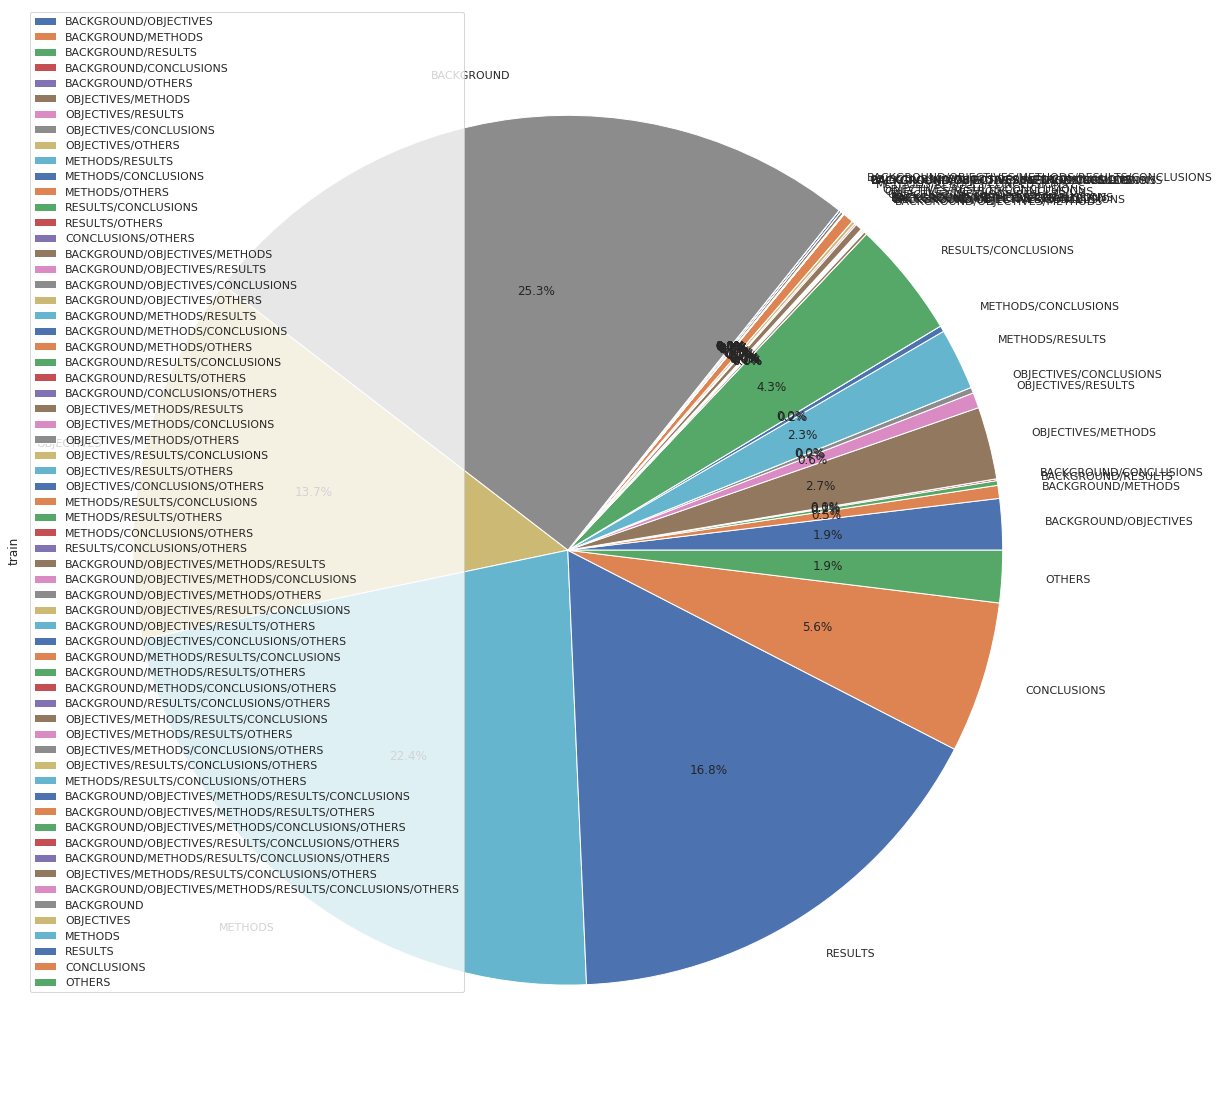

In [85]:
label_df.plot.pie(y='train', autopct='%1.1f%%', figsize=(20,20))

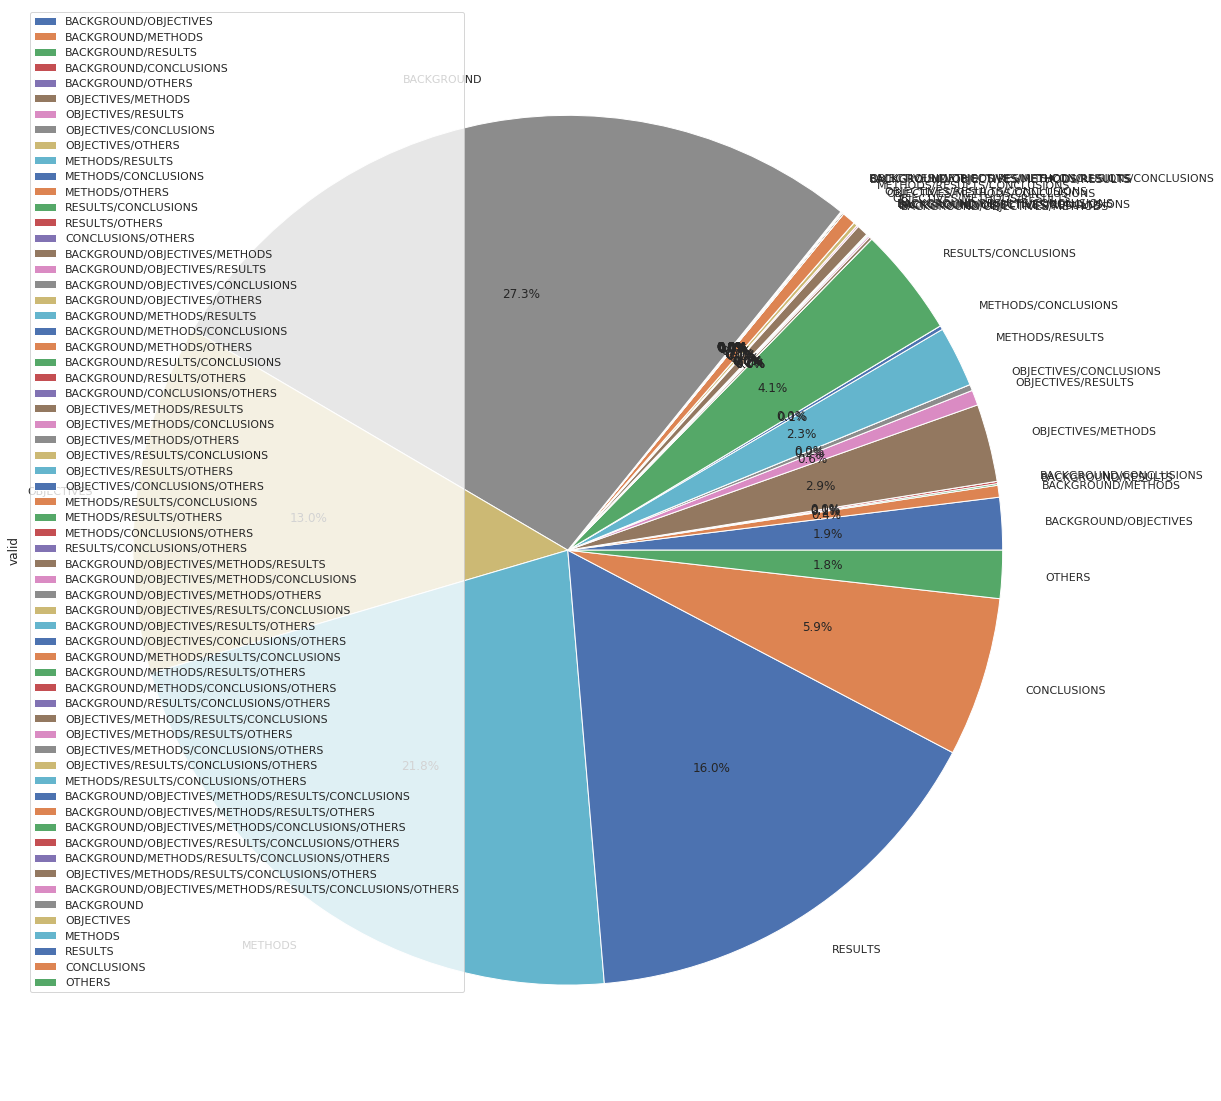

In [86]:
label_df.plot.pie(y='valid', autopct='%1.1f%%', figsize=(20,20))